# CDNow User Analysis
reference: https://www.jianshu.com/p/3233a513d9da

# 1 Project Background

CDnow, Inc. was a dot-com company that operated an online shopping website selling compact discs and music-related products. In April 1998, during the dot-com bubble, the company was valued at over $1 billion.
This project analyzes the user consumption behavior from the consumption data.

## Data Description

The data came from the transactions from 01/01/1997 to 30/06/1998 of CDNow 
Link: https://raw.githubusercontent.com/cjycathy/Datawhale_Python4Data_Analysis/master/Final/CDNOW.txt
The data contain four columns: userID, purchase date, order counts and order price 

# 2 Data Preparation

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_table('CDNOW.txt',header=None,sep='\s+',names=['ID','DATE','COUNT','PRICE'])
data.head()

,ID,DATE,COUNT,PRICE
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


### Descriptive statistics

In [37]:
data.describe()

,ID,DATE,COUNT,PRICE
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


Result shows that the average order count and price is 2.41 and 35.89. The standard deviation of order count is 2.33, which means there is fluctuation. 

### Data cleaning

In [39]:
# check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
ID       69659 non-null int64
DATE     69659 non-null int64
COUNT    69659 non-null int64
PRICE    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


There are no null value in the data

In [55]:
# convert the string of DATE columns to datetime object
data['DATE']=pd.to_datetime(data.DATE,format='%Y%m%d')
data['MONTH']=data.DATE.values.astype('datetime64[M]')
data.head()

,ID,DATE,COUNT,PRICE,MONTH
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [57]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
ID       69659 non-null int64
DATE     69659 non-null datetime64[ns]
COUNT    69659 non-null int64
PRICE    69659 non-null float64
MONTH    69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


# 3 Analysis of General User Consumption Tendency

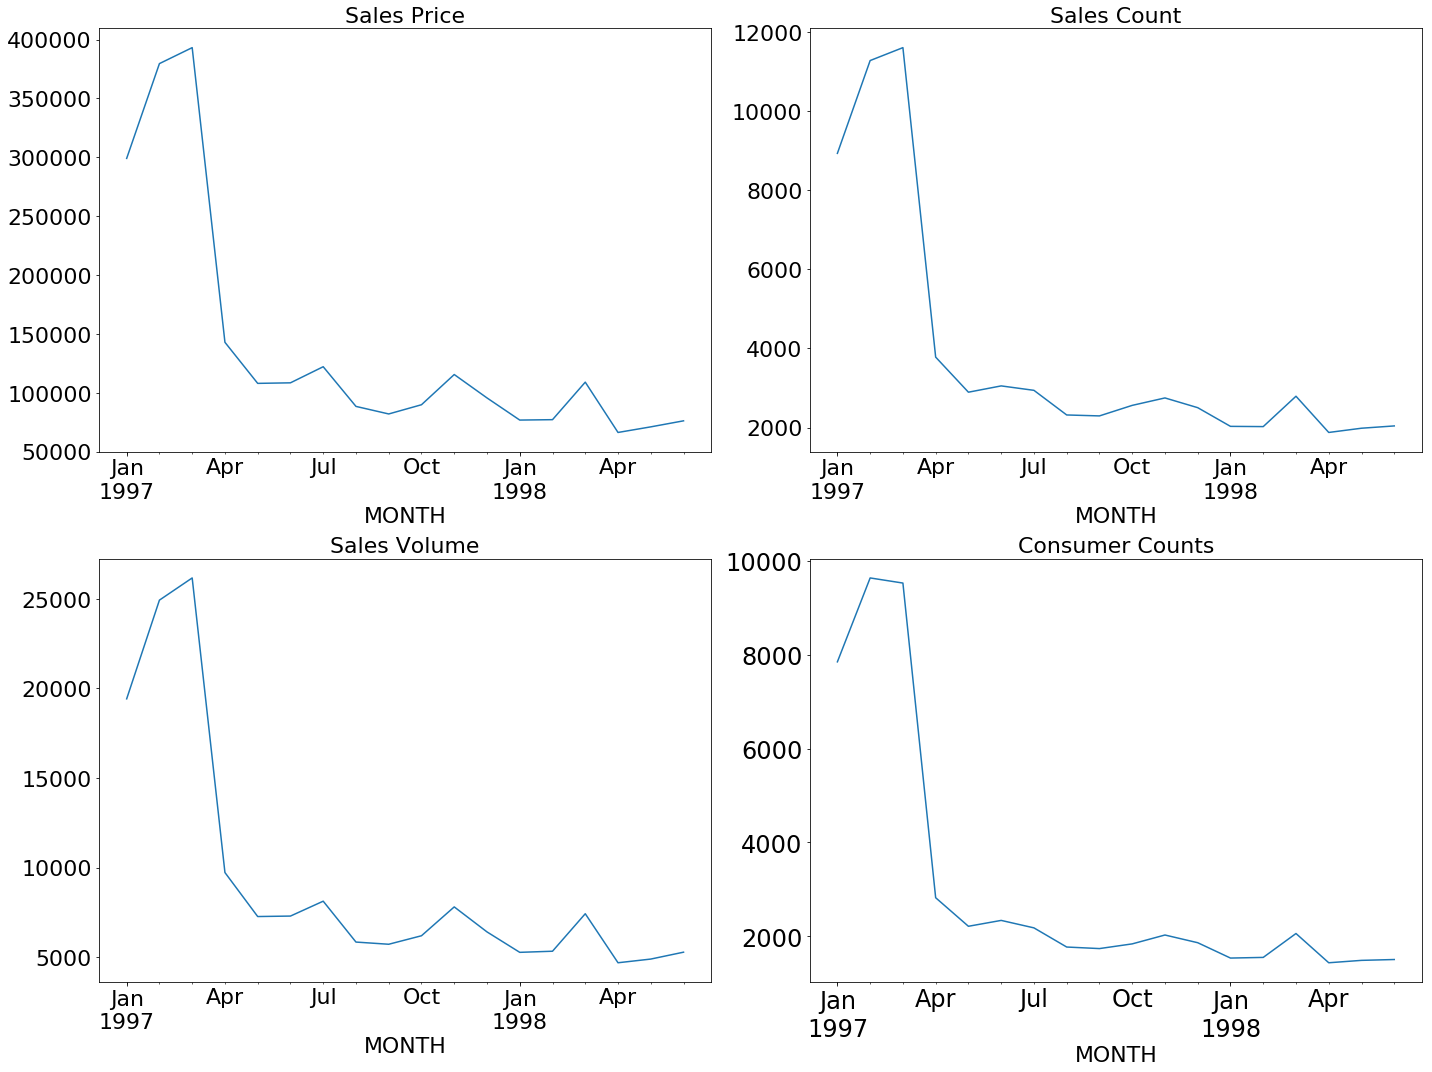

In [89]:
# create figure
plt.figure(figsize=(20,15))

# sum of monthly sales price
ax=plt.subplot(2,2,1)
data.groupby('MONTH')['PRICE'].sum().plot(fontsize=22)
plt.title('Sales Price',fontsize=22)
plt.xlabel('MONTH', fontsize=22)

# sales count of months
plt.subplot(2,2,2)
data.groupby('MONTH')['DATE'].count().plot(fontsize=22)
plt.title('Sales Count',fontsize=22)
plt.xlabel('MONTH', fontsize=22)

# sales volume of months
plt.subplot(2,2,3)
data.groupby('MONTH')['COUNT'].sum().plot(fontsize=22)
plt.title('Sales Volume',fontsize=22)
plt.xlabel('MONTH', fontsize=22)

# consumer counts of months
plt.subplot(2,2,4)
data.groupby('MONTH')['ID'].apply(lambda x:len(x.unique())).plot(fontsize=24)
plt.title('Consumer Counts',fontsize=22)
plt.xlabel('MONTH', fontsize=22)
plt.tight_layout()
plt.show()

# 4 Analysis of Individual Consumption  

### Descriptive Analysis

In [91]:
group_user = data.groupby('ID').sum()
group_user.describe()

,COUNT,PRICE
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


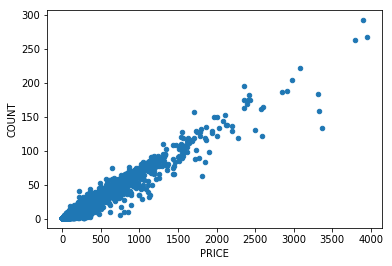

In [92]:
group_user.query('PRICE<4000').plot.scatter(x='PRICE',y='COUNT')